# Temperature Over Time
I am going to be analzsing the temperature data over time in Coeur D'Alene, Idaho.



## Step 0: Setup Environment
Pandas is a useful library for working with tabular data. <br>
HvPlot is a usefule library to easily create interactive plots. <br>
Geopandas allows us to make GeoDataFrames<br>
Matplotlib is used for plotting the regression <br>
Seaborn is also used for plotting the regression <br>
SkLearn provides the model we use for the linear regression

In [1]:
# Import everything we need
import pandas as pd
import hvplot.pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Step 1: Wrangle Data
We are going to be getting data from [NOAA](https://www.ncdc.noaa.gov/cdo-web/).


In [2]:
# Create the URL for getting NOAA weather data.
ncei_url = ('https://www.ncei.noaa.gov/access/services/data/'
           'v1?dataset=daily-summaries&dataTypes=TOBS&stations'
           '=USC00101956&startDate=1908-01-01&endDate=2013-12-31&units=standard')
ncei_url
# Call the API to get the data we need
temperature_df = pd.read_csv(
    ncei_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)
# Make sure the call worked
temperature_df.head()

,STATION,TOBS
DATE,,
1908-12-01,USC00101956,27.0
1908-12-02,USC00101956,27.0
1908-12-03,USC00101956,30.0
1908-12-04,USC00101956,27.0
1908-12-05,USC00101956,27.0


Here, we are going to download the data to the working directory. This makes it so we don't have to download the data from NOAA every time.

In [3]:
temperature_df.to_csv('cda_tobs.csv')

Next, we want to clean up the dataframe. We only want the TOBS and Date columns.

In [4]:
temperature_df = temperature_df[['TOBS']]
temperature_df

,TOBS
DATE,
1908-12-01,27.0
1908-12-02,27.0
1908-12-03,30.0
1908-12-04,27.0
1908-12-05,27.0
...,...
2013-12-27,27.0
2013-12-28,30.0
2013-12-29,28.0


Lastly, we want to make the columns more readable.

In [5]:
# Rename column and save into new dataframe.
cda_daily_temps = temperature_df.rename(columns={
    'TOBS' : 'temperature_f',
})
# Check it worked
cda_daily_temps

,temperature_f
DATE,
1908-12-01,27.0
1908-12-02,27.0
1908-12-03,30.0
1908-12-04,27.0
1908-12-05,27.0
...,...
2013-12-27,27.0
2013-12-28,30.0
2013-12-29,28.0


## Step 1.5: Temperature Conversions
Right now, we just have all the temperatures saved as TOBS and in degrees Fahrenheit. It may be useful for analysis to also have the data in Celsius, so we should have both temperature values saved in this dataframe.

In [6]:
# This function converts fahrenheit to celsius
def fahrenheitToCelsius(tempFahrenheit):
    """Convert Fahrenheit temperature to Celcius"""
    return (tempFahrenheit - 32) * (5/9)

# Run this funciton on all rows in dataframe and store in new column
cda_daily_temps['temperature_c'] = (
    cda_daily_temps['temperature_f'].apply(fahrenheitToCelsius))
# Check this worked
cda_daily_temps

,temperature_f,temperature_c
DATE,,
1908-12-01,27.0,-2.777778
1908-12-02,27.0,-2.777778
1908-12-03,30.0,-1.111111
1908-12-04,27.0,-2.777778
1908-12-05,27.0,-2.777778
...,...,...
2013-12-27,27.0,-2.777778
2013-12-28,30.0,-1.111111
2013-12-29,28.0,-2.222222


## Step 2: Visualize/Analyze Data

<Axes: title={'center': "Coeur D'Alene, Idaho"}, xlabel='Year', ylabel='Temperature (Fahrenheit)'>

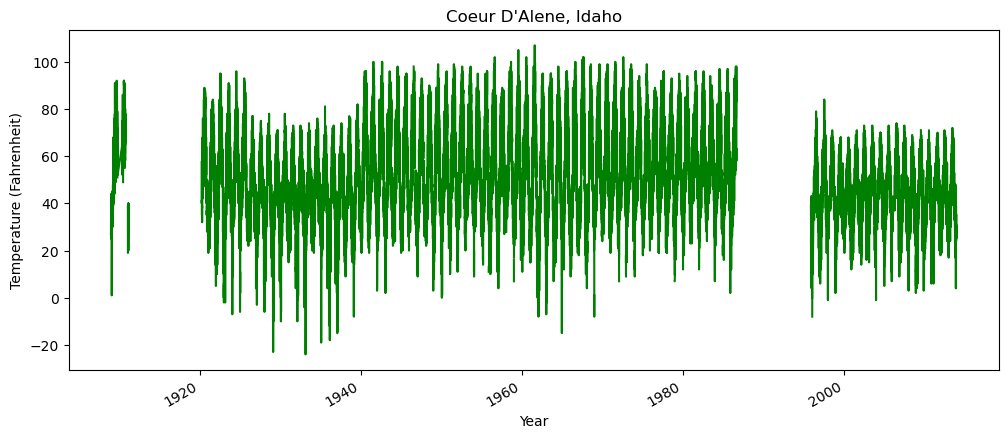

In [7]:
# Plot the data using .plot
cda_daily_temps.plot(
    y='temperature_f',
    title="Coeur D'Alene, Idaho",
    xlabel='Year',
    ylabel='Temperature (Fahrenheit)',
    figsize=(12,5),
    legend=False,
    color='g'
)

As we can see from this initial plot, it looks like we are missing a bunch of data. In order to compensate for that, I am going to decide to only plot and analyze a smaller portion of this data.<br><br>
We are going to use 1930-1985.

In [8]:
# Select a slice of the data using .loc method.
cda_daily_temps = cda_daily_temps.loc['1930-01-01':'1985-12-31']
cda_daily_temps

,temperature_f,temperature_c
DATE,,
1930-01-01,34.0,1.111111
1930-01-02,30.0,-1.111111
1930-01-03,33.0,0.555556
1930-01-04,46.0,7.777778
1930-01-05,30.0,-1.111111
...,...,...
1985-12-27,29.0,-1.666667
1985-12-28,28.0,-2.222222
1985-12-29,24.0,-4.444444


Next, lets make this data look better by resampling it. We can take the average over each year and plot that. 

In [9]:
cda_annual_temps =(
    cda_daily_temps
    .resample('YS') # YS corresponds to Year Start
    .mean() # Take average over each year.
)

<Axes: title={'center': "Coeur D'Alene Annual Temperatures 1930-1985"}, xlabel='Year', ylabel='Temperature (Fahrenheit)'>

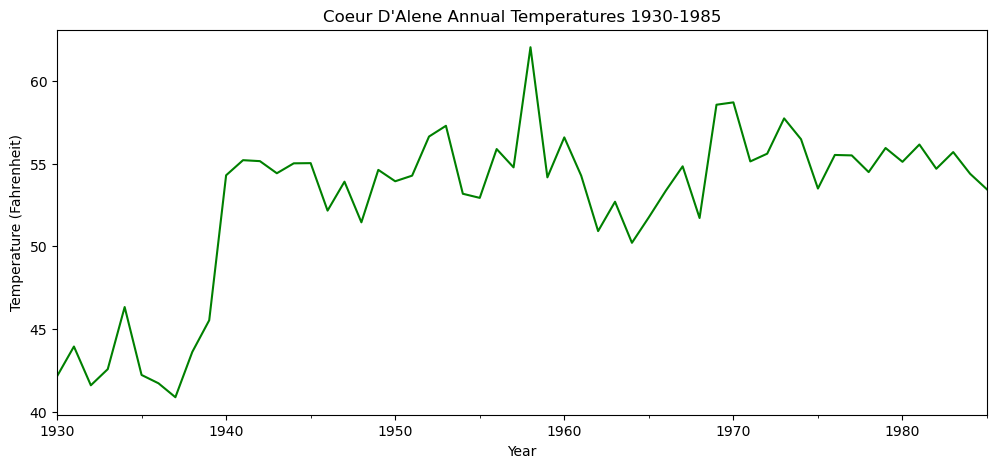

In [10]:
# Plot the annual data
cda_annual_temps.plot(
    y="temperature_f",
    title="Coeur D'Alene Annual Temperatures 1930-1985",
    xlabel="Year",
    ylabel="Temperature (Fahrenheit)",
    figsize=(12,5),
    legend=False,
    color='g'
)

This is really interesting. It seems the average temperature jumped dramatically going into the 1940's. According to [NOAA](https://psl.noaa.gov/enso/past_events.html), there were both El Nino and La Nina events during this time period, so those couldn't account for this variation. <br><br>
This period of really low average temperatures also coincides with the Dust Bowl. According to the [National Science Foundation](https://news.ucar.edu/132872/1930s-dust-bowl-affected-extreme-heat-around-northern-hemisphere), the Dust Bowl affected not just the American Midwest but much of the Northern Hemisphere. In the article, it claims that the Northern Hemisphere saw record heat during this period. As we can tell, this data is not lining up with that.
<br><br>
I have a couple of theories for why the data may look like this.
1. There may be lots of missing data during the summers of these years. This could cause the annual average to skew colder than it actually was.
2. Since we are taking the temperature only at a single time of day if that time were to shift, so would the temperatures we see. The observation time in the 30s may have been morning or evening, and then the standard at the station was changed to mid-day during the 40s
<br>I am going to remove the 30s before doing any sort of linear regression so the slope isn't skewed.

In [11]:
# Slice out the 30s
cda_annual_temps = cda_annual_temps.loc['1940-01-01':'1985-12-31']

# Fit an OLS Linear Regression to the data

cda_annual_temps = cda_annual_temps.reset_index()
# Clean the data
cda_annual_temps_clean = cda_annual_temps.dropna()

# Fit columns to arrays for scikit-learn
X = cda_annual_temps_clean[['DATE']].values
Y = cda_annual_temps_clean[['temperature_f']].values

# Create and fit linear regression
model = LinearRegression()
model.fit(X,Y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: [6.55444724e-19]
Intercept: [54.91889886]


Now with this model, we can plot the linear regression.

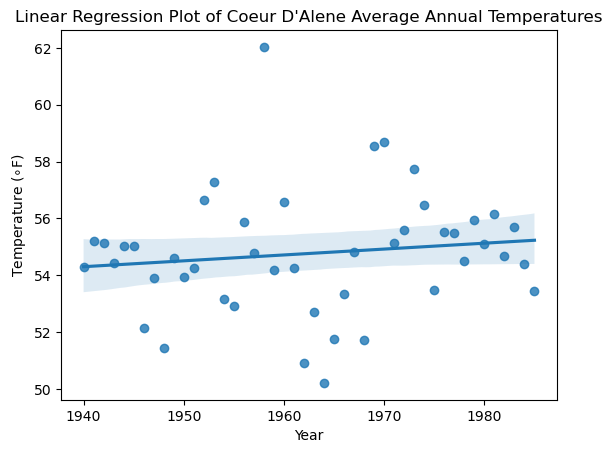

In [12]:
# Convert datetime objects into integers
cda_annual_temps_clean['DATE'] = pd.to_datetime(cda_annual_temps_clean['DATE']).dt.year

# Plot the annual average temperature with a trend line
ax = sns.regplot(
    x=cda_annual_temps_clean[['DATE']],
    y=cda_annual_temps_clean[['temperature_f']]
)
# Label the plots
ax.set(
    title= "Linear Regression Plot of Coeur D'Alene Average Annual Temperatures",
    xlabel='Year',
    ylabel='Temperature ($\circ$F)'
)
# Display the plot
plt.show()

Visually, you can see the average temperatures have seemed to raise over those 45 years, although not at a very fast pace. This linear regression does not take into account any sort of other variations, such as El Nino and La Nina, so that may be a reason we are not seeing a steeper slope here.

## Bonus: Mount Saint Helens

On May 18th, 1980, Mount Saint Helens had a major eruption caused destruction and damage throughout the Pacific Northwest and beyond. When the volcano erupted, it spred more than 520 million tons of ash eastward. According to the [USGS](https://volcanoes.usgs.gov/observatories/cvo/Historical/LewisClark/Info/summary_mount_st_helens.shtml), it caused complete darkness in Spokane, Washington.

In [13]:
# Create a dictionary of my locations of interest
locations_of_interest = {
    'Name': ['Mount Saint Helens', 'Spokane, Washington', "Coeur D'Alene Weather Station"],
    'Latitude': [46.2020, 47.6649, 47.6821],
    'Longitude': [-122.1830, -117.4031, -116.7967]
}
# Turn my dictionary into a geopandas geodataframe
locations_of_interest_gdb = gpd.GeoDataFrame(
    locations_of_interest, # Input data
    geometry= gpd.points_from_xy( # Create the points we are going to draw
        locations_of_interest['Longitude'], 
        locations_of_interest['Latitude']),
    crs="EPSG:4326" # Coordinate Reference System
)
# Plot that bad boy on a map.
locations_of_interest_gdb.hvplot.points(geo=True, tiles=True, size=100, color="red", marker="diamond")

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

Due to the geographic closeness of Spokane and Coeur D'Alene, we can assume the ash also fell heavy in Coeur D'Alene. Lets take a look at how that affected temperatures days before, and the month following!

In [14]:
# Take a slice of the daily data from the day of the eruption to a month after.
eruption_temperature_data = cda_daily_temps.loc['1980-05-10':'1980-06-18']

# Make an interactive plot so it's easier to view the data
eruption_temperature_plot = eruption_temperature_data.hvplot(
    y="temperature_f",
    title="Coeur D'Alene Daily Temperatures Following Mt. St. Helens Eruption",
    xlabel="Date",
    ylabel="Temperature ($\circ$F)",
    color='green',
    legend=False
)

eruption_temperature_plot

:Curve   [DATE]   (temperature_f)

Interesting!! As you can see, the temperature sort of stalled the day the volcano erupted, clocking the same observation the next day. The temperature then continues to rise and peaks two days after the eruption, and then plummets. 